In [ ]:
# import os

# if os.path.realpath(".").split(os.path.sep)[-1] != "Quant-Finance":
# os.chdir("..")


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

import quant as qt

/Users/nakulrandad/Development/Quant-Finance/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
qt.plot.set_plot_options()

## Nifty ETFs and Mutual Funds against Nifty 50 Index

In [4]:
schemes = qt.api.mf_list(filter=["Nifty", "50", "UTI|Navi", "Direct", "Growth"])
schemes

,schemeCode,schemeName
19370,120716,UTI Nifty 50 Index Fund - Growth Option- Direct
36329,143341,UTI Nifty Next 50 Index Fund - Direct Plan - G...
43869,149039,Navi Nifty 50 Index Fund-Direct Plan-Growth
44319,149447,Navi Nifty Next 50 Index Fund- Direct Plan- Gr...
44598,149892,Navi Nifty Midcap 150 Index Fund Direct Plan- ...
44888,150313,UTI Nifty Midcap 150 Quality 50 Index Fund - D...
45928,151471,NAVI ELSS TAX SAVER NIFTY 50 INDEX FUND - DIRE...
46123,151739,UTI Nifty 500 Value 50 Index Fund - Direct Pla...
46145,151762,UTI Nifty50 Equal Weight Index Fund - Direct P...
47350,153089,UTI Nifty Midcap 150 Index Fund - Direct Plan ...


In [5]:
mf_df = pd.DataFrame.quant.mutual_fund([120716, 149039]).quant.to_returns()
mf_df.quant.first_valid_index()

asset
Navi Nifty 50 Index Fund-Direct Plan-Growth       2021-07-19
UTI Nifty 50 Index Fund - Growth Option- Direct   2013-01-03
Name: date, dtype: datetime64[ns]

In [6]:
nifty_etf = (
    pd.DataFrame.quant.ticker(["NIFTYBEES.NS", "SETFNIF50.NS"])
    .loc["2020-01-01":]
    .quant.to_returns()
)
nifty_etf

,NIFTYBEES.NS,SETFNIF50.NS
date,,
2020-01-02,0.005563,0.005330
2020-01-03,-0.003304,-0.001424
2020-01-06,-0.018040,-0.017038
2020-01-07,0.003062,0.002338
2020-01-08,-0.001565,-0.002333
...,...,...
2024-12-09,-0.002682,-0.002607
2024-12-10,-0.001672,-0.000231
2024-12-11,0.001056,0.001000


In [7]:
bmk = pd.DataFrame.quant.ticker("^NSEI").quant.to_returns()
bmk

,^NSEI
date,
2007-09-18,0.011469
2007-09-19,0.040946
2007-09-20,0.003212
2007-09-21,0.018957
2007-09-24,0.019566
...,...
2024-12-09,-0.002383
2024-12-10,-0.000364
2024-12-11,0.001290


In [8]:
df = pd.concat([mf_df, nifty_etf, bmk], axis=1).quant.ralign()

<Axes: title={'center': 'Cumulative Returns'}, xlabel='date'>

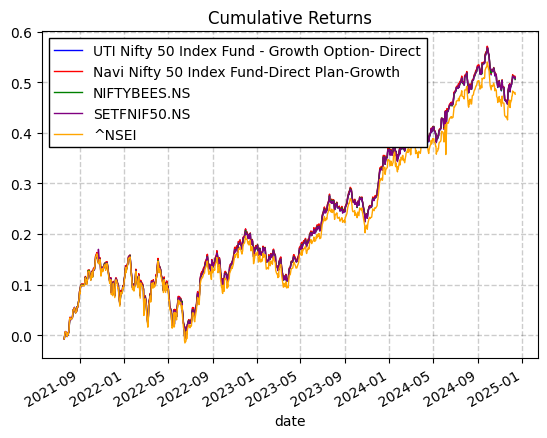

In [9]:
df.cumsum().plot(title="Cumulative Returns")

In [10]:
qt.backtest.perf_summary_table(df.drop(columns=["^NSEI"]), bmk=df[["^NSEI"]])

In [11]:
qt.backtest.perf_summary_table(df[["^NSEI"]])

<Axes: >

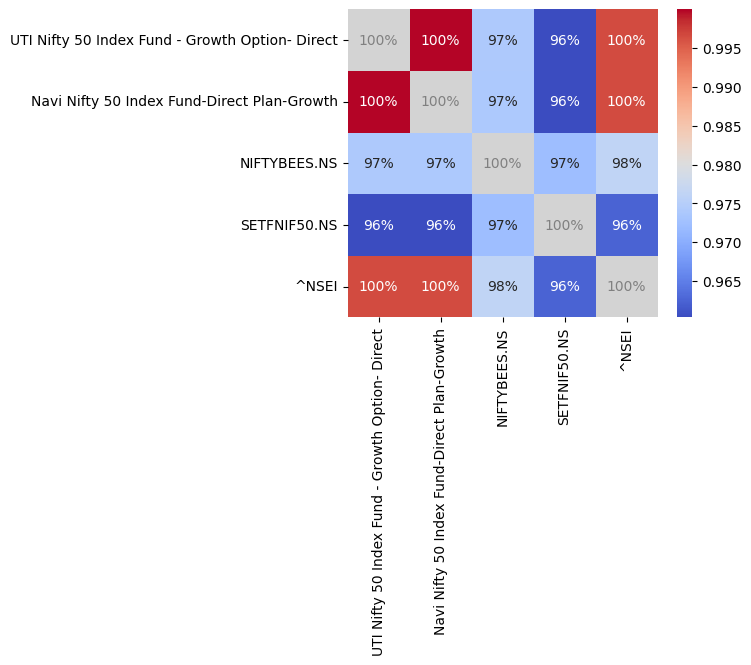

In [12]:
plt.figure(figsize=(5, 4))
qt.plot.corr(df)

<Axes: title={'center': 'Rolling 1-year volatility'}, xlabel='date'>

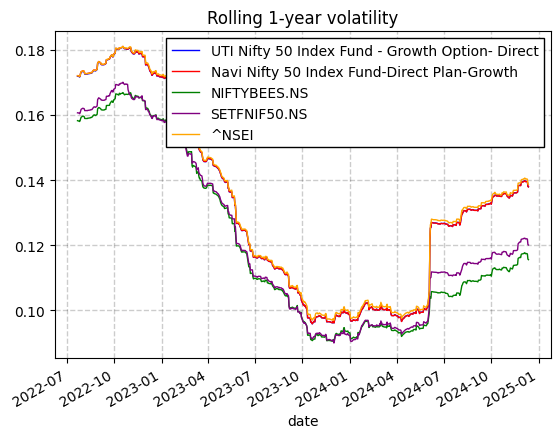

In [13]:
df.rolling(252).std().mul(252**0.5).plot(title="Rolling 1-year volatility")

<Axes: title={'center': 'Growth of Rupee'}, xlabel='date'>

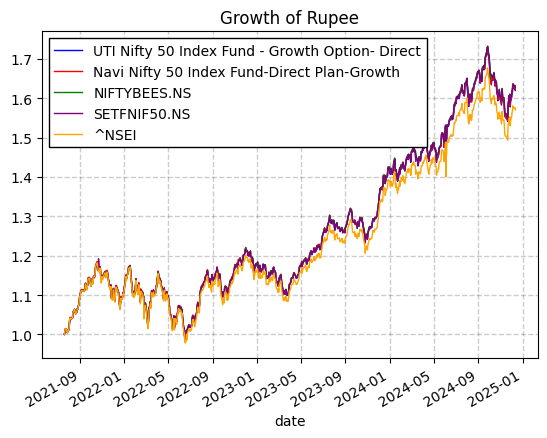

In [14]:
df.quant.to_prices().quant.rebase(1).plot(title="Growth of Rupee")

<Axes: xlabel='periods', ylabel='Variance Ratio'>

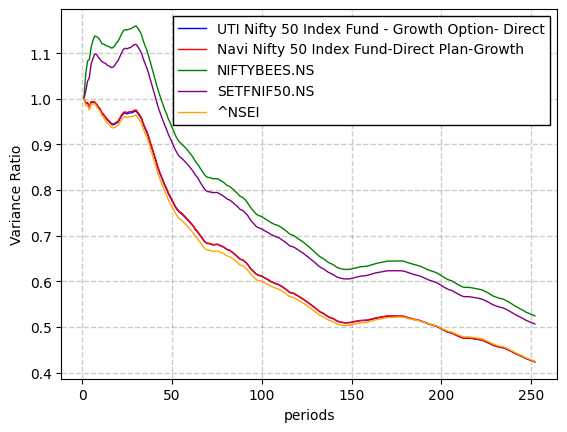

In [18]:
df.quant.variance_ratio_test().plot(ylabel="Variance Ratio", xlabel="periods")

## Junior Bees vs Nifty Bees

In [15]:
next50 = pd.DataFrame.quant.ticker(["JUNIORBEES.NS"]).quant.to_returns()

In [16]:
merged = pd.concat([df[["NIFTYBEES.NS"]], next50], axis=1).quant.ralign()
qt.backtest.perf_summary_table(merged, bmk=merged[["NIFTYBEES.NS"]])

<Axes: title={'center': 'Growth of Rupee'}, xlabel='date'>

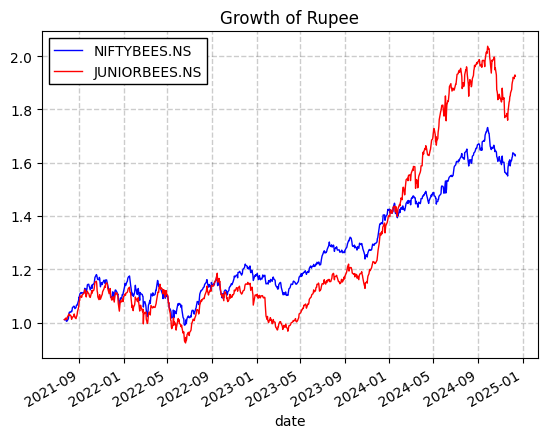

In [17]:
merged.quant.to_prices().plot(title="Growth of Rupee")

<Axes: xlabel='periods', ylabel='Variance Ratio'>

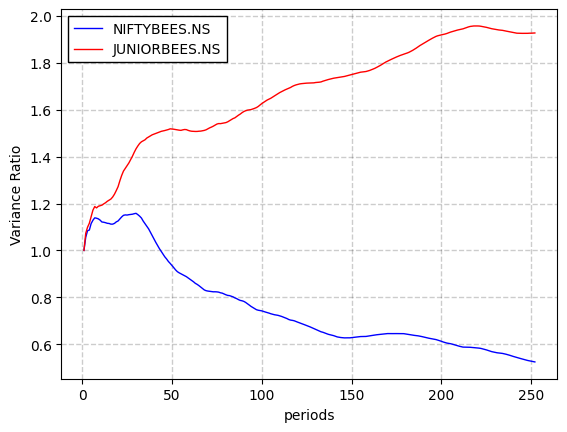

In [21]:
merged.quant.variance_ratio_test(periods=252).plot(
    ylabel="Variance Ratio", xlabel="periods"
)

# Nifty50 and S&P500

In [ ]:
ret = (
    pd.DataFrame.quant.ticker(["^NSEI", "^CRSLDX", "^GSPC"])
    .quant.palign()
    .quant.to_returns()
    .quant.agg_returns("W")
)
ret.describe()

Ticker,^NSEI,^CRSLDX,^GSPC
count,912.000000,912.000000,912.000000
mean,0.002107,0.002203,0.001713
std,0.028135,0.028626,0.023855
min,-0.190239,-0.186527,-0.151689
25%,-0.012643,-0.011645,-0.007951
50%,0.003770,0.004399,0.004039
75%,0.017406,0.018422,0.014895
max,0.174692,0.193851,0.113127


<Axes: xlabel='Ticker', ylabel='Ticker'>

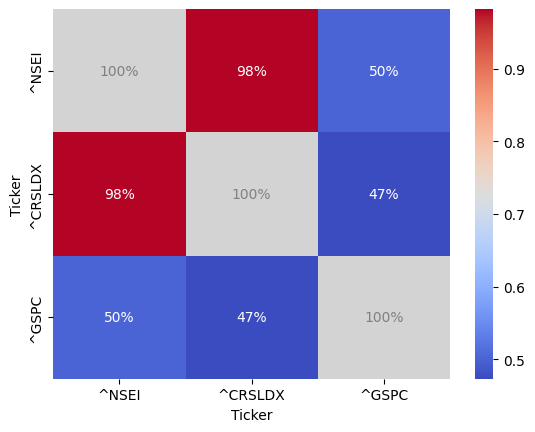

In [10]:
qt.plot.corr(ret)

Start date: 2007-09-26
End date: 2025-03-12


,Start Date,End Date,Drawdown
^NSEI,2008-01-09,2009-03-11,-58.97%
^CRSLDX,2008-01-09,2009-03-11,-63.92%


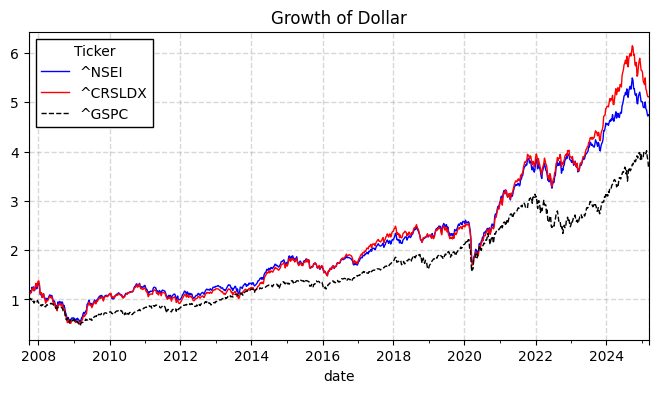

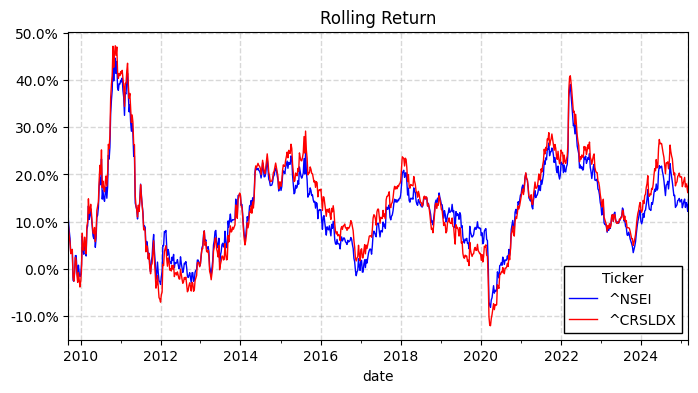

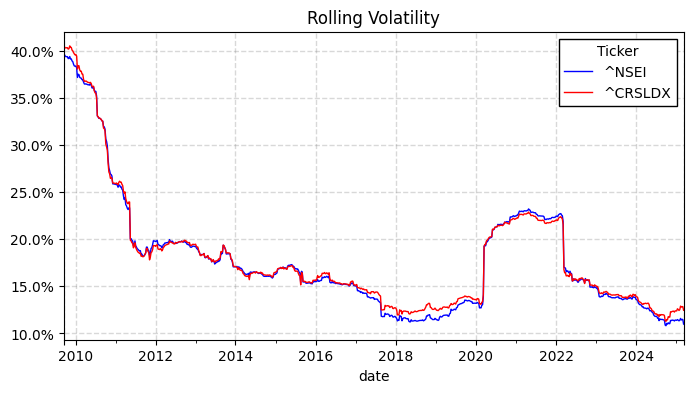

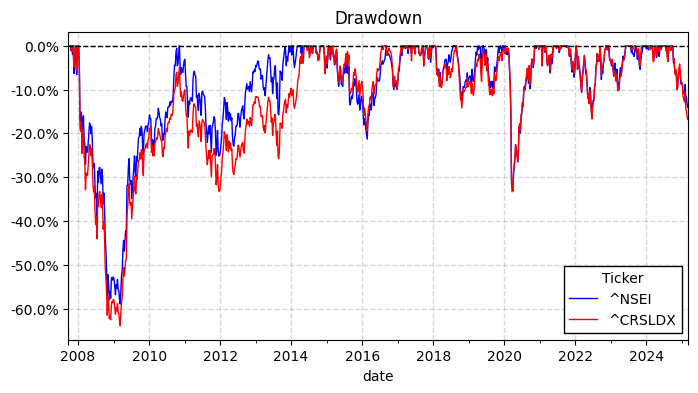

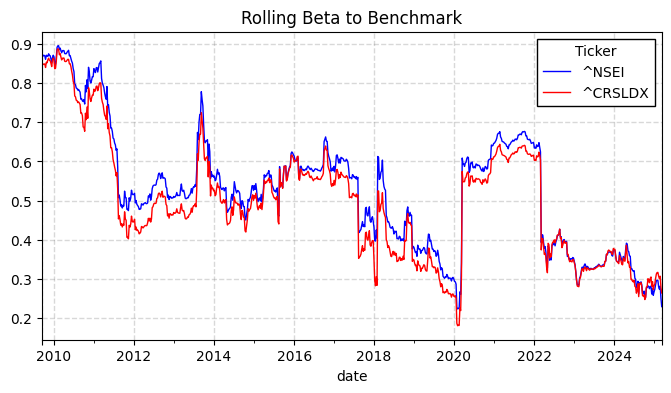

In [12]:
qt.backtest.perf_report(ret.iloc[:, :-1], bmk=ret[["^GSPC"]], yr=52, window=104)

In [106]:
ret = (
    pd.DataFrame.quant.ticker(["^CRSLDX", "^GSPC", "INR=X", "GC=F", "BZ=F"])
    .quant.palign()
    .quant.to_returns()
    .quant.agg_returns("W")
)
ret.describe()
print(ret.quant.first_valid_index())

asset
^CRSLDX   2007-08-08
^GSPC     2007-08-08
INR=X     2007-08-08
GC=F      2007-08-08
BZ=F      2007-08-08
Name: date, dtype: datetime64[ns]


In [105]:
ret.iloc[:, :1].quant.factor_model(ret.iloc[:, 1:])

alpha      beta                                \
                                          ^GSPC     INR=X      GC=F      BZ=F   
^GSPC | INR=X                0.605075  0.436948 -0.987915       NaN       NaN   
^GSPC | INR=X | BZ=F         0.607563  0.414507 -0.990968       NaN  0.024732   
^GSPC | INR=X | GC=F         0.597685  0.435466 -0.983333  0.014558       NaN   
^GSPC | INR=X | GC=F | BZ=F  0.604929  0.414439 -0.989304  0.005092  0.024236   
INR=X | BZ=F                 0.824991       NaN -1.252279       NaN  0.097736   
INR=X | GC=F | BZ=F          0.819976       NaN -1.249073  0.009564  0.096781   
^GSPC                        0.328344  0.562838       NaN       NaN       NaN   
^GSPC | GC=F                 0.301434  0.553735       NaN  0.064156       NaN   
^GSPC | BZ=F                 0.329649  0.545216       NaN       NaN  0.019764   
^GSPC | GC=F | BZ=F          0.304608  0.541896       NaN  0.058814  0.014128   
INR=X                        0.868652       NaN -1.304458       NaN       NaN   
INR=X | GC=F                 0.837240       NaN -1.283013  0.055203       NaN   
BZ=F                         0.536443       NaN       NaN       NaN  0.122617   
GC=F | BZ=F                  0.498325       NaN       NaN  0.085239  0.113541   
GC=F                         0.508373       NaN       NaN  0.141458       NaN   

                                   ir        r2          aic          bic  
                                                                           
^GSPC | INR=X                1.619682  0.328253 -4278.292949 -4263.823091  
^GSPC | INR=X | BZ=F         1.628368  0.329922 -4278.579410 -4259.286265  
^GSPC | INR=X | GC=F         1.600072  0.328397 -4276.490422 -4257.197277  
^GSPC | INR=X | GC=F | BZ=F  1.621328  0.329939 -4276.602703 -4252.486272  
INR=X | BZ=F                 2.074704  0.238914 -4163.543071 -4149.073213  
INR=X | GC=F | BZ=F          2.062173  0.238974 -4161.615429 -4142.322284  
^GSPC                        0.815665  0.220023 -4143.010978 -4133.364406  
^GSPC | GC=F                 0.750186  0.222872 -4144.372912 -4129.903053  
^GSPC | BZ=F                 0.819468  0.221090 -4142.268539 -4127.798681  
^GSPC | GC=F | BZ=F          0.758342  0.223397 -4142.994255 -4123.701110  
INR=X                        2.141294  0.207889 -4128.824000 -4119.177427  
INR=X | GC=F                 2.066598  0.209984 -4129.257928 -4114.788070  
BZ=F                         1.207086  0.049356 -3961.163523 -3951.516951  
GC=F | BZ=F                  1.124191  0.054215 -3963.872601 -3949.402743  
GC=F                         1.123300  0.014126 -3927.722170 -3918.075598

<Axes: title={'center': 'Rolling Beta of NSE500'}, xlabel='date'>

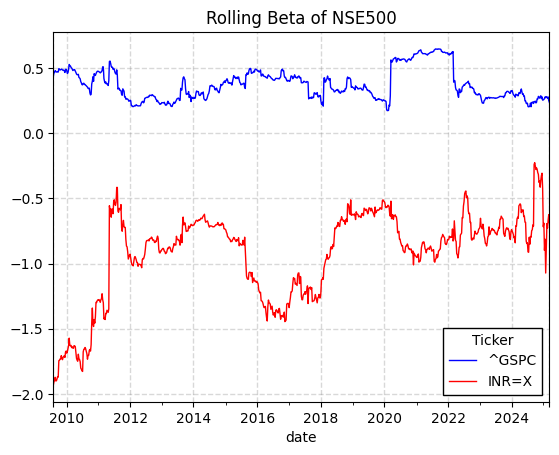

In [ ]:
qt.backtest.rolling_multibeta(
    ret.iloc[:, :1], factor=ret.iloc[:, 1:3], window=104
).plot(title="Rolling Beta of NSE500")